In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data={
    "age": np.random.randint(21, 56, size=200),
    "exper": np.random.randint(0,21, size=200),
    "income": np.random.randint(10, 200, size=200),
    "education": np.random.choice([1, 2, 3], size=200),
    "mortgae": np.random.choice(["yes", "no"], size=200)
}
df=pd.DataFrame(data)
df.head(4)

,age,exper,income,education,mortgae
0,26,4,189,1,yes
1,29,14,188,3,yes
2,27,12,136,1,yes
3,29,15,77,2,yes


In [16]:
from sklearn.preprocessing import LabelEncoder
myprocess=LabelEncoder()
df['mortgae']=myprocess.fit_transform(df['mortgae'])
df.head()

,age,exper,income,education,mortgae
0,26,4,189,1,1
1,29,14,188,3,1
2,27,12,136,1,1
3,29,15,77,2,1
4,21,16,82,1,1


In [17]:
df.isnull().sum()

age          0
exper        0
income       0
education    0
mortgae      0
dtype: int64

<Axes: >

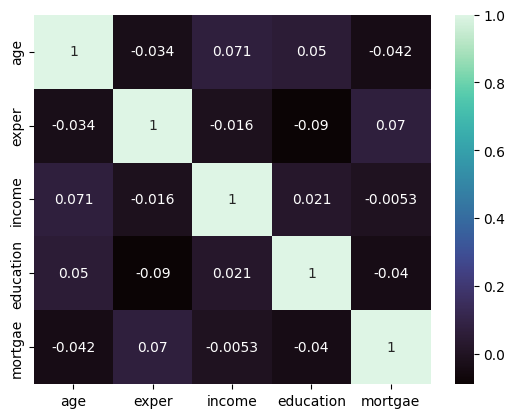

In [18]:
sns.heatmap(df.corr(), annot=True, cmap="mako")

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale=StandardScaler()

In [22]:
scale.fit(df.drop('mortgae',axis=1))

StandardScaler()

In [26]:
scaled=scale.transform(df.drop('mortgae',axis=1))


In [30]:
scaled_df=pd.DataFrame(scaled,columns=df.columns[:-1])
scaled_df.head()

,age,exper,income,education
0,-1.242415,-0.991027,1.463675,-1.145743
1,-0.922891,0.728014,1.445933,1.358614
2,-1.135907,0.384206,0.523375,-1.145743
3,-0.922891,0.899918,-0.523375,0.106435
4,-1.774955,1.071822,-0.434667,-1.145743


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X=scaled_df
y=df['mortgae']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=123)

In [34]:
from sklearn.svm import SVC

In [35]:
mymodel=SVC()

In [36]:
mymodel.fit(X_train, y_train)

SVC()

In [38]:
pred=mymodel.predict(X_test)

In [40]:
print(y_test.shape)
print(pred.shape)

(60,)
(60,)


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 3 31]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.27      0.09      0.13        34
           1       0.37      0.69      0.48        26

    accuracy                           0.35        60
   macro avg       0.32      0.39      0.31        60
weighted avg       0.31      0.35      0.28        60



## GrdiserachCV

In [43]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={"C":[0.1, 1, 10, 100], "gamma":[1, 0.1, 0.01, 0.001]}

In [52]:
grid=GridSearchCV(SVC(), param_grid, verbose=2)

In [53]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [54]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [56]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [57]:
pred=grid.predict(X_test)

In [58]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 2 32]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.29      0.06      0.10        34
           1       0.40      0.81      0.53        26

    accuracy                           0.38        60
   macro avg       0.34      0.43      0.31        60
weighted avg       0.33      0.38      0.29        60

